### Reuben Martor
### DSC 550 Data Mining
### Project Milestone 1: Data Selection and EDA

"Predicting Cardiac Events: A Machine Learning Approach to Assess Risk Factors in Patients with Heart Failure"


In [1]:
# Important liberaries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [138]:
# Graphical analysis 

import pandas as pd

# Load the dataset
data = pd.read_csv('~/heart_failure_prediction.csv')


In [3]:
# let's examined first few rows of the dataset
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


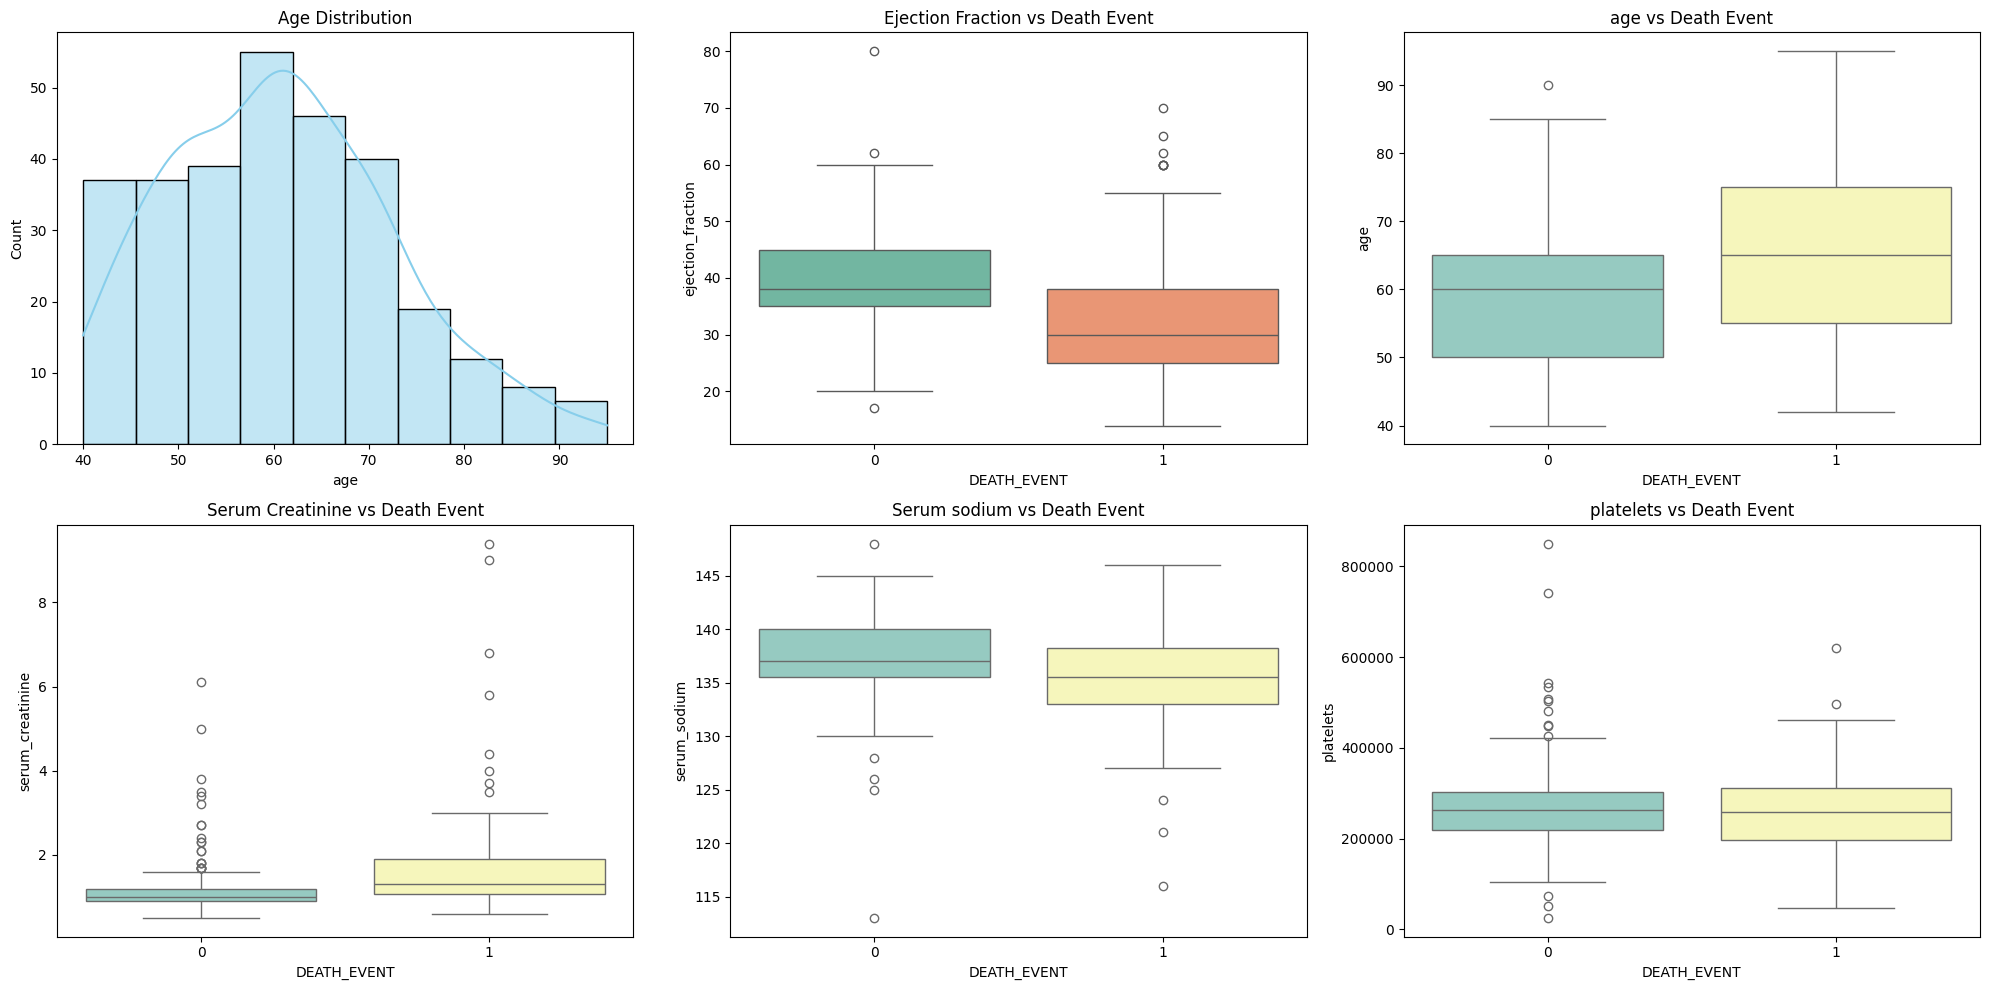

In [4]:
# Graphical analysis 

import matplotlib.pyplot as plt
import seaborn as sns

# Preparing for a 2x2 subplot layout for graphical analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plotting the distribution of age
sns.histplot(data=data, x="age", kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')

# Plotting the relationship between ejection fraction and death event
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=data, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Ejection Fraction vs Death Event')

# Plotting the relationship between serum creatinine and death event
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data, ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title('Serum Creatinine vs Death Event')

# Plotting the relationship between serum sodium and death event
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=data, ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Serum sodium vs Death Event')


# Plotting the relationship between age and death event
sns.boxplot(x='DEATH_EVENT', y='age', data=data, ax=axes[0, 2], palette='Set3')
axes[0, 2].set_title('age vs Death Event')

#Plotting the relationship between platelets and death event
sns.boxplot(x='DEATH_EVENT', y='platelets', data=data, ax=axes[1, 2], palette='Set3')
axes[1, 2].set_title('platelets vs Death Event')

# Adjusting layout
plt.tight_layout()

#### Reuben Martor
#### DSC 550 Data Mining
#### Project Milestone 2: Data Preparation 

"Predicting Cardiac Events: A Machine Learning Approach to Assess Risk Factors in Patients with Heart Failure"

## Descriptive statistics: I will like to understand my data better

In [5]:
# determine no of rows and columns
print(f'Number of rows: {data.shape[0]}\nNumber of Columns: {data.shape[1]}  ')

Number of rows: 299
Number of Columns: 13  


In [6]:
data.info()  # what are the data types? Is there a reason to change some features to boolean? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# continous features
continuous_features = data[['age','creatinine_phosphokinase', 'ejection_fraction',\
                            'platelets','serum_creatinine','serum_sodium','time']]
continuous_features.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


### Data transformation 
##### Check for missing/duplicate data

In [8]:
df_missing = data.isnull().any().any() # check for any missing data in the dataset
print(f'Missing data: {df_missing}')
df_duplicate = data.duplicated().any().any()
print(f'Duplicate data: {df_duplicate}')

Missing data: False
Duplicate data: False


##### Check for outliers

In [9]:
# Calculate Z-scores for each column
from scipy.stats import zscore
z_scores = data.apply(zscore)

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = (z_scores > 3) | (z_scores < -3)
# Display outliers
outliers_result = data[outliers.any(axis=1)]
print(outliers_result)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1    55.0        0                      7861         0                 38   
4    65.0        1                       160         1                 20   
9    80.0        1                       123         0                 35   
19   48.0        1                       582         1                 55   
28   58.0        1                        60         0                 38   
52   60.0        0                      3964         1                 62   
60   45.0        0                      7702         1                 25   
64   45.0        0                       582         0                 80   
72   85.0        0                      5882         0                 35   
103  42.0        0                      5209         0                 30   
105  72.0        1                       328         0                 30   
109  45.0        0                       292         1                 35   

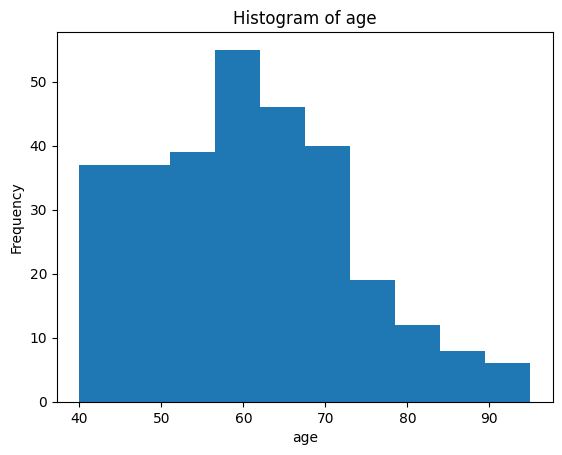

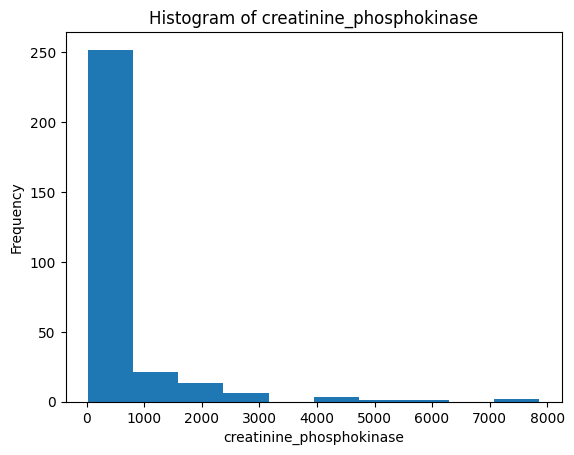

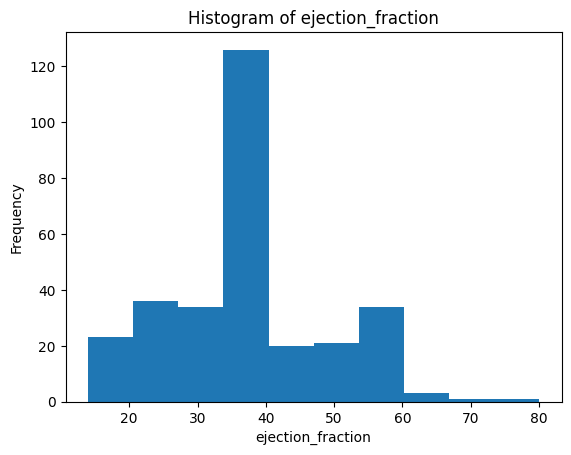

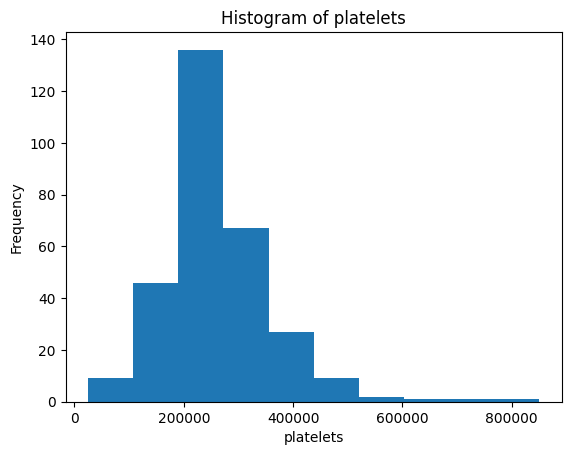

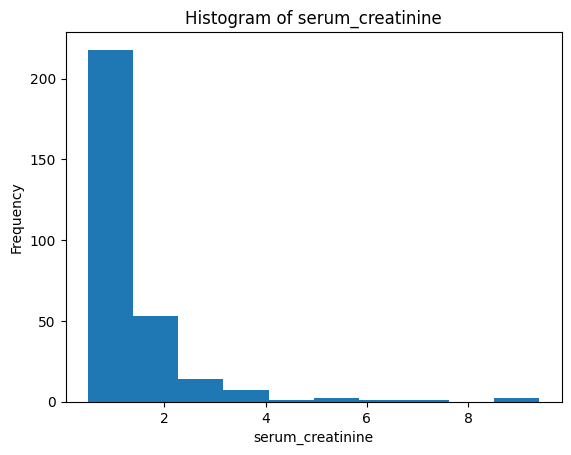

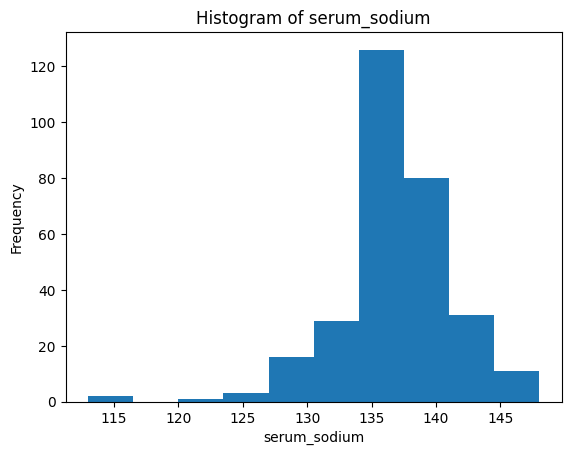

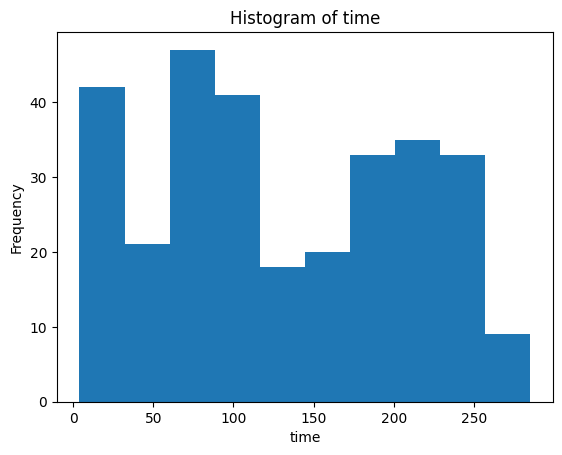

In [10]:
# I will plot histogram of every continuous feature to see distribution  
for column in continuous_features.columns:
    plt.figure()  # Creates a new figure
    continuous_features[column].hist(bins=10)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False) 
    plt.show()

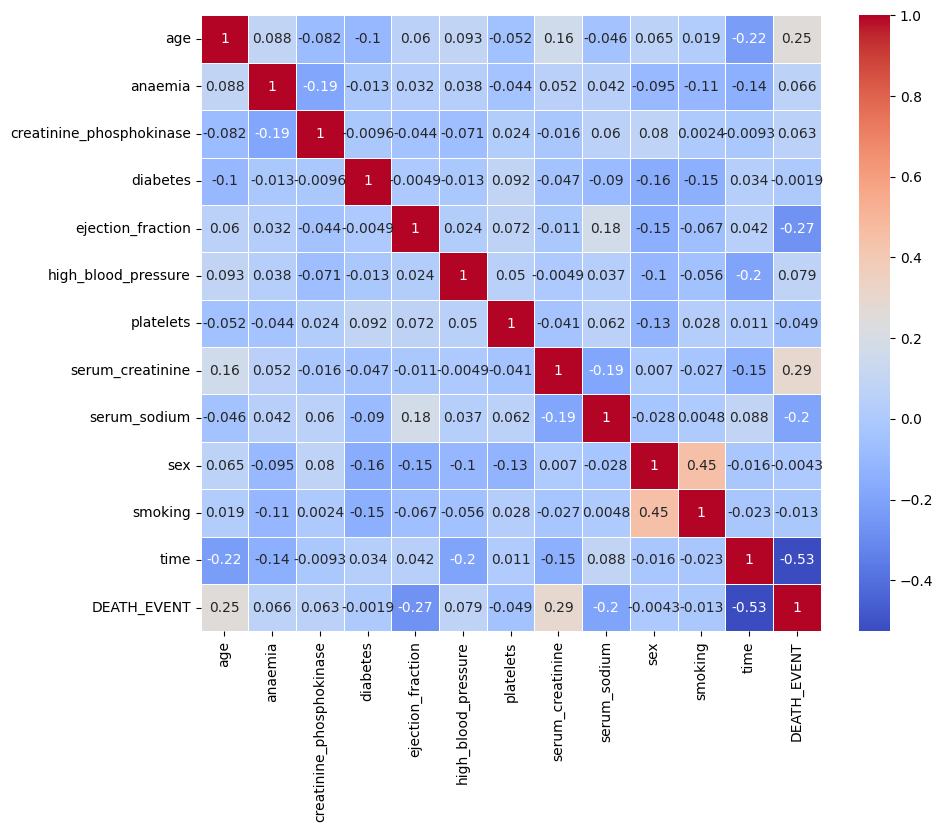

In [11]:
# I would assume all features are important for the model at this time. However, correlation matrix 
# may help me see some fundamental relationships.
# check for correlation
corr_matrix = data.corr()
# Generate a heatmap
plt.figure(figsize=(10,8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


## I will assume all features are important in this dataset 

In [12]:
# Define X (features) and y (target variable)
X = data.drop('DEATH_EVENT', axis=1) 
y = data['DEATH_EVENT']
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [13]:
# Because of the variation in continuous variables "age, creatinine_phosphokinase,
# ejection_fraction,platelets,serum_creatinine, time, and serum_sodium, it might be a good idea to scale the data to normalize 
# the ranges for my model. 

# I will use two different scaling to see which one will improve my model

# StandardScaler
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
continuous_features = ['age','creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
# create copy of original data for scaling
data_standscaled= data.copy()
data_standscaled[continuous_features] = stand_scaler.fit_transform(data[continuous_features])

#minMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmax_scaled = data.copy()
data_minmax_scaled[continuous_features] = minmax_scaler.fit_transform(data[continuous_features])
data_minmax_scaled.head()
scaled_df =data_minmax_scaled[continuous_features]

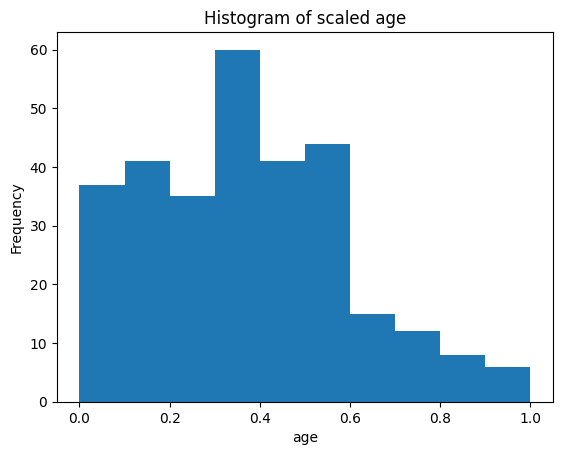

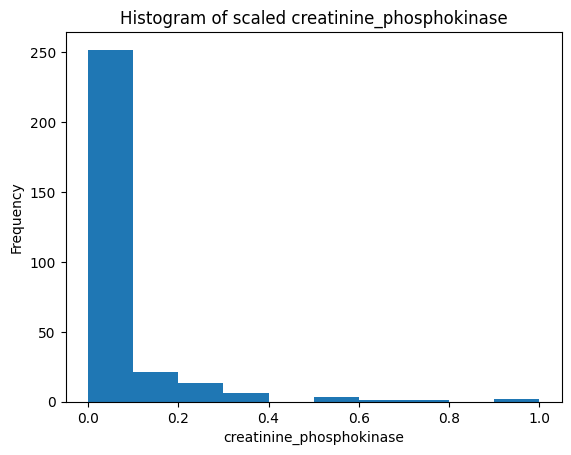

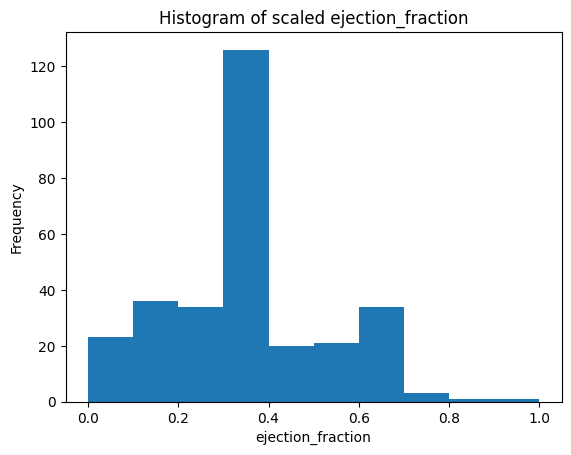

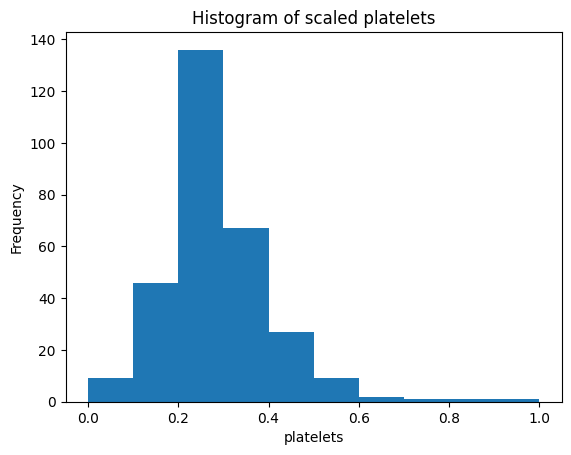

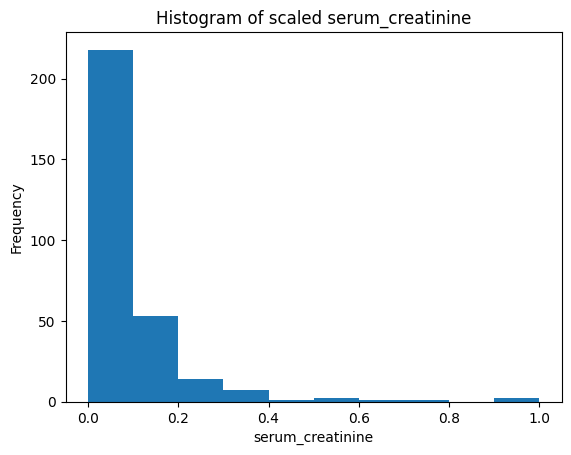

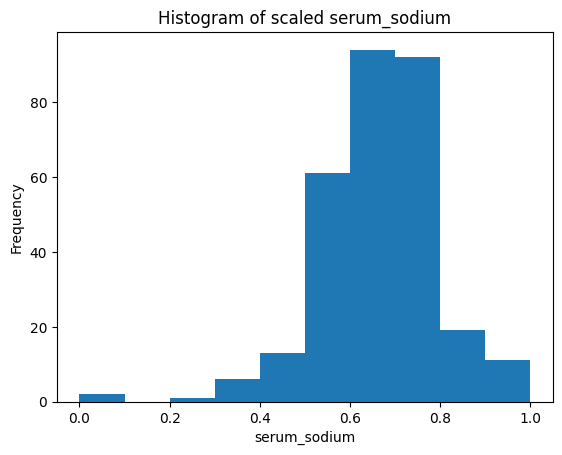

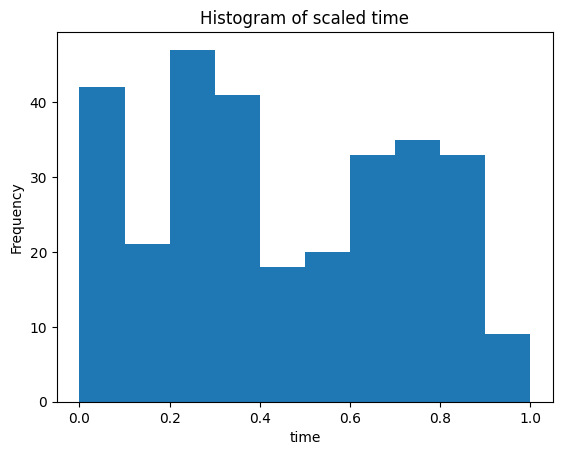

In [14]:
# A picture of histogram of scaled data

for column in scaled_df.columns:
    plt.figure()  # Creates a new figure
    scaled_df[column].hist(bins=10)  
    plt.title(f'Histogram of scaled {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False) 
    plt.show()

In [15]:
X_scaled_mmax = data_minmax_scaled.drop('DEATH_EVENT', axis=1)  # using minmax scaler
y = data_minmax_scaled['DEATH_EVENT']  # y does not need scaling
X_scaled_stand = data_standscaled.drop('DEATH_EVENT', axis=1) # using standard scaler

X_scaled_mmax.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235


In [16]:
# how many y values are 1(heart incident) and 0(no heart incident)?
y.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [17]:
X_scaled_stand.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879


### Reuben Martor
### DSC 550 Data Mining
### Poject Milestone 3: Model Building and Evaluation 

"Predicting Cardiac Events: A Machine Learning Approach to Assess Risk Factors in Patients with Heart Failure"

In [18]:
# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import svm



In [19]:
# read features and target
x_stand_scaled = X_scaled_stand
x_max_scaled = X_scaled_mmax
x_stand_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879


In [20]:
x_max_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235


In [21]:
# convert dataframe to array
x_standard = np.asarray(x_stand_scaled)
x_max = np.asarray(x_max_scaled)

In [22]:
x_standard
x_max

array([[0.63636364, 0.        , 0.07131921, ..., 1.        , 0.        ,
        0.        ],
       [0.27272727, 0.        , 1.        , ..., 1.        , 0.        ,
        0.00711744],
       [0.45454545, 0.        , 0.01569278, ..., 1.        , 1.        ,
        0.01067616],
       ...,
       [0.09090909, 0.        , 0.25988773, ..., 0.        , 0.        ,
        0.97508897],
       [0.09090909, 0.        , 0.30492473, ..., 1.        , 1.        ,
        0.98220641],
       [0.18181818, 0.        , 0.02207196, ..., 1.        , 1.        ,
        1.        ]])

In [23]:
# list of models 
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state=0) ]


In [24]:
# function to compare models 
def compare_models_cross_val():
    result =[]
    for model in models:
        cv_score = cross_val_score(model,x_standard,y, cv=5)
        mean_accuracy =sum(cv_score)/len(cv_score)
        mean_accuracy = round((mean_accuracy*100),2) # acuracy in percent rounded to 2 decimal places 
        print(f'Cross val accuracies for {model} = {cv_score}')
        print(f'Accurracy score of the {model} = {mean_accuracy} %')
              
        result.append({"Model": model, "Accuracy": mean_accuracy})
    
    # Convert results into a DataFrame
    result_df = pd.DataFrame(result)
    return result_df

# Call the function and print the results DataFrame # for standard scaling 
result_df = compare_models_cross_val()
result_df

Cross val accuracies for LogisticRegression(max_iter=1000) = [0.65       0.78333333 0.88333333 0.85       0.6779661 ]
Accurracy score of the LogisticRegression(max_iter=1000) = 76.89 %
Cross val accuracies for SVC(kernel='linear') = [0.73333333 0.78333333 0.9        0.83333333 0.6779661 ]
Accurracy score of the SVC(kernel='linear') = 78.56 %
Cross val accuracies for KNeighborsClassifier() = [0.7        0.76666667 0.73333333 0.76666667 0.69491525]
Accurracy score of the KNeighborsClassifier() = 73.23 %
Cross val accuracies for RandomForestClassifier(random_state=0) = [0.43333333 0.8        0.81666667 0.71666667 0.6779661 ]
Accurracy score of the RandomForestClassifier(random_state=0) = 68.89 %


,Model,Accuracy
0,LogisticRegression(max_iter=1000),76.89
1,SVC(kernel='linear'),78.56
2,KNeighborsClassifier(),73.23
3,RandomForestClassifier(random_state=0),68.89


In [25]:
# will try using minmax scaled data
# function to compare models 
def compare_models_cross_val():
    result =[]
    for model in models:
        cv_score = cross_val_score(model,x_max,y, cv=5)
        mean_accuracy =sum(cv_score)/len(cv_score)
        mean_accuracy = round((mean_accuracy*100),2) # acuracy in percent rounded to 2 decimal places 
        print(f'Cross val accuracies for {model} = {cv_score}')
        print(f'Accurracy score of the {model} = {mean_accuracy} %')
              
        result.append({"Model": model, "Accuracy": mean_accuracy})
    
    # Convert results into a DataFrame
    result_df = pd.DataFrame(result)
    return result_df

# Call the function and print the results DataFrame # for standard scaling 
result_df = compare_models_cross_val()
result_df

Cross val accuracies for LogisticRegression(max_iter=1000) = [0.71666667 0.88333333 0.86666667 0.8        0.6779661 ]
Accurracy score of the LogisticRegression(max_iter=1000) = 78.89 %
Cross val accuracies for SVC(kernel='linear') = [0.65       0.76666667 0.88333333 0.8        0.6779661 ]
Accurracy score of the SVC(kernel='linear') = 75.56 %
Cross val accuracies for KNeighborsClassifier() = [0.58333333 0.7        0.61666667 0.7        0.6440678 ]
Accurracy score of the KNeighborsClassifier() = 64.88 %
Cross val accuracies for RandomForestClassifier(random_state=0) = [0.41666667 0.81666667 0.83333333 0.71666667 0.6779661 ]
Accurracy score of the RandomForestClassifier(random_state=0) = 69.23 %


,Model,Accuracy
0,LogisticRegression(max_iter=1000),78.89
1,SVC(kernel='linear'),75.56
2,KNeighborsClassifier(),64.88
3,RandomForestClassifier(random_state=0),69.23


### Based upon these results for the data, Logisticregression has the highest accuracy value with the default hyperparameter values


#### I will now utilize GridSearchCV to compare the models with different Hyperparameter values

In [26]:
Models = [LogisticRegression(max_iter=10000), SVC(),KNeighborsClassifier(),RandomForestClassifier(random_state=0) ]


In [27]:
# I will create a dictionery that contains hyperparamter values for the above models 
hyper_params = {
    'log_reg_hyper_params': {
         'C': [1, 5, 10, 20]  # Corrected 'c' to 'C' to match scikit-learn's convention
    },
    'svc_hyper_params': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added a missing comma at the end of this line
        'C': [1, 5, 10, 20]  # Corrected 'c' to 'C' to match scikit-learn's convention
    },
    'knn_hyper_params': {
        'n_neighbors': [2, 3, 5, 10]
    },
    'random_forest_hyper_params': {
        'n_estimators': [10, 20, 50, 100]
    }
}
# create a list of keys for hyperparameters
model_keys = list(hyper_params.keys())
model_keys

['log_reg_hyper_params',
 'svc_hyper_params',
 'knn_hyper_params',
 'random_forest_hyper_params']

In [28]:
#### Now I will apply GridSearchCV 
def selectModel(model_list, hyperparam_dict):
    results =[]
    i = 0
    for model in model_list:
        key = model_keys[i]
        params = hyperparam_dict[key]
        i += 1
        print(model)
        print(params)
        print('-------------'*5)
        classifier = GridSearchCV(model, params, cv=5)
        # Fit the data to the classifier
        classifier.fit(x_standard, y)
        results.append({
            'Model used': model.__class__.__name__, # Use model's class name for a cleaner output
            'Highest Score': classifier.best_score_,
            'Best hyperparameters': classifier.best_params_
        })

    results_df = pd.DataFrame(results, columns=['Model used', 'Highest Score', 'Best hyperparameters'])
    return results_df

##### Model hyper Tunning results

In [29]:
selectModel(Models, hyper_params)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
-----------------------------------------------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
-----------------------------------------------------------------
KNeighborsClassifier()
{'n_neighbors': [2, 3, 5, 10]}
-----------------------------------------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
-----------------------------------------------------------------


,Model used,Highest Score,Best hyperparameters
0,LogisticRegression,0.768927,{'C': 1}
1,SVC,0.798983,"{'C': 1, 'kernel': 'sigmoid'}"
2,KNeighborsClassifier,0.742373,{'n_neighbors': 3}
3,RandomForestClassifier,0.722316,{'n_estimators': 10}


##### After hyper tunning , SVC becomes the model with the highest accuracy score followed by LogistRegression. I will therefore use SVC to train my data to perform the prediction 

In [30]:
# Now I can divide my dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x_standard,y, test_size=0.2, random_state=42)

In [31]:
# View sample size
print(f'x Train: {x_train.shape[0]}, x test: {x_test.shape[0]}, y train:{y_train.shape[0]}, y test: {y_test.shape[0]}')

x Train: 239, x test: 60, y train:239, y test: 60


In [32]:
model = svm.SVC(kernel='sigmoid',C=1)

In [33]:
classifier_svc = model.fit(x_standard,y)

In [34]:
y_pred = classifier_svc.predict(x_test)

In [35]:
print(y_pred)

[0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1]


In [36]:
# print report perfmronace report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.75      0.60      0.67        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.75      0.75      0.74        60



##### Insight and conclusion 
This milestone provided deeper insights into the predictive factors of cardiac events, highlighting the importance of certain biomarkers and clinical parameters in risk assessment. The evaluation of different models offered a clear comparison of their strengths and weaknesses, guiding the selection of the most effective approach for this application. It was observed that models incorporating feature engineering and parameter optimization outperformed simpler models, underscoring the value of these techniques in improving model accuracy.

Conclusion:
Milestone 3 represents a significant step forward in the development of a predictive tool for cardiac event risk assessment. The insights gained from the model building and evaluation processes have not only refined my understanding of the key factors influencing cardiac events but also highlighted the potential of machine learning in transforming healthcare practices. Going forward, the project will focus on further model optimization, exploring the integration of future course contents if applicable. The ultimate goal remains to provide a reliable, accurate tool that can assist in the early detection and management of patients at high risk for cardiac events, potentially improving outcomes and saving lives.

This summary encapsulates the progress made in Milestone 3, highlighting the critical insights and conclusions drawn from the rigorous process of model building and evaluation. The focus on advanced techniques and thorough evaluation underscores the project's commitment to developing a robust predictive tool for healthcare applications.